In [1]:
import tigramite
from tigramite import data_processing as pp
from tigramite import plotting as tp
from tigramite.pcmci import PCMCI
from tigramite.independence_tests import ParCorr, GPDC, CMIknn, CMIsymb
from tigramite.models import LinearMediation, Prediction

import tigramite
from tigramite import data_processing as pp
from tigramite import plotting as tp
from tigramite.pcmci import PCMCI
from tigramite.independence_tests import ParCorr, GPDC, CMIknn, CMIsymb
from tigramite.models import LinearMediation, Prediction
import pymannkendall as mk

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


/Users/tianyl/opt/anaconda3/lib/python3.9/site-packages/tigramite/data_processing.py:1133: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def _get_patterns(array, array_mask, patt, patt_mask, weights, dim, step, fac, N, T):
/Users/tianyl/opt/anaconda3/lib/python3.9/site-packages/tigramite/plotting.py:26: UserWarning: [Errno 2] No such file or directory: '/Users/tianyl/opt/anaconda3/lib/python3.9/site-packages/tigramite/../versions.py'
  warnings.warn(str(e))
/Users/tianyl/opt/anaconda3/lib/python3.9/site-packages/tigramite/independence_tests/gpdc.py:27: UserWarning: No module named 'dcor'
  warnings.warn(str(e))
/Users/tianyl/opt/anaconda3/lib/python3.9/site-packages/tigrami

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
#import cartopy.crs as ccrs
#from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

import copy
from netCDF4 import Dataset, num2date, date2num
import more_itertools as mit
from scipy import arange, cos, exp
from scipy.interpolate import RegularGridInterpolator
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn import metrics
from matplotlib import pyplot
import matplotlib.patches as patches
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression

import xarray as xr
import seaborn as sns

from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator


from matplotlib import colors as c
import matplotlib.patches as mpatches
from tslearn.utils import to_time_series_dataset
#import cartopy.feature as cf
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib as mpl


from scipy import signal

from scipy.stats import rankdata
# Global Spatial Autocorrelation
#from spatial_autocorrelation import get_moransI, moransI_scatterplot, hypothesis_testing
# Local Spatial Autocorrelation
#from spatial_autocorrelation import get_localMoransI, LISA_scatterplot
from scipy.stats import linregress
import scipy
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import random
import pandas as pd
from scipy import signal

# land mask, time and spatial information

In [3]:
# NCname = 'land_mask.nc'
# NCData = Dataset(NCname)
# land_mask = np.squeeze(NCData.variables['lsm'][:])
# NCData.close()

NCname = r'/Users/tianyl/Desktop/Study/4_summer school in como/CEU_CEN_data/ERA5_Z500_6h_1979-2020_daymean_del29feb_1x1_5days.nc'
NCData = Dataset(NCname)
#t2m = NCData.variables['t2m'][:]
#t2m[t2m==-32767.] = np.nan
print(NCData.variables['lon'][:][:10])
time = NCData.variables['time']
dates = list(num2date(time[:], time.units, time.calendar))
year_era5_all = np.array([date.year for date in dates])
mon_era5_all = np.array([date.month for date in dates])
day_era5_all = np.array([date.day for date in dates])
NCData.close()


[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]


In [4]:
def remove_seasonal(var,yearN,stepN):
    var_detrend = np.zeros_like(var)
    for i_box in range(stepN):
        temp = np.array([var[stepN*i_year+i_box] for i_year in range(yearN)])
        temp = temp - np.array(len(temp)*[np.nanmean(temp,axis=0)])
        temp = signal.detrend(temp,axis=0)
        for i_year in range(yearN):
            var_detrend[stepN*i_year+i_box]  = temp[i_year]
    return var_detrend 

In [5]:
def remove_seasonal_normalized(var,yearN,stepN):
    var_detrend = np.zeros_like(var)
    for i_box in range(stepN):
        temp = np.array([var[stepN*i_year+i_box] for i_year in range(yearN)])
        temp = (temp - np.array(len(temp)*[np.nanmean(temp,axis=0)]))/np.array(len(temp)*[np.nanstd(temp,axis=0)])
        temp = signal.detrend(temp,axis=0)
        for i_year in range(yearN):
            var_detrend[stepN*i_year+i_box]  = temp[i_year]
    return var_detrend 

# Central europe region

In [6]:
stepN = len(year_era5_all[year_era5_all==1979])
yearN = 42

In [7]:
lb_EU = 3
rb_EU = 18
bb_EU = 45
tb_EU = 55

# variables

In [8]:
t2m_region_o = np.array(xr.open_dataset('/Users/tianyl/Desktop/Study/4_summer school in como/CEU_CEN_data/t2m_region.nc')['__xarray_dataarray_variable__'][:][:])
tp_region_o = np.array(xr.open_dataset('/Users/tianyl/Desktop/Study/4_summer school in como/CEU_CEN_data/tp_region.nc')['__xarray_dataarray_variable__'][:][:])
PET_region_o = np.array(xr.open_dataset('/Users/tianyl/Desktop/Study/4_summer school in como/CEU_CEN_data/PET_region.nc')['__xarray_dataarray_variable__'][:][:])
WSD_region_o = tp_region_o*1000*24-PET_region_o

z500_T_o = np.array(xr.open_dataset('/Users/tianyl/Desktop/Study/4_summer school in como/CEU_CEN_data/z500_T2m_6Waves.nc')['__xarray_dataarray_variable__'][:][:])
z500_WSD_o = np.array(xr.open_dataset('/Users/tianyl/Desktop/Study/4_summer school in como/CEU_CEN_data/z500_WSD_6Waves.nc')['__xarray_dataarray_variable__'][:][:])
z500_c_o = np.array(xr.open_dataset('/Users/tianyl/Desktop/Study/4_summer school in como/CEU_CEN_data/z500_compound.nc')['__xarray_dataarray_variable__'][:][:])


In [9]:
print('start week ',np.where((year_era5_all==1979)&(mon_era5_all==6))[0][0])
print('time_cycle ',len(np.where((year_era5_all==1979))[0]))
print('n_steps ',len(np.where((year_era5_all==1979)&(np.in1d(mon_era5_all,[6,7,8])))[0]))

start week  30
time_cycle  73
n_steps  19


In [10]:
n_years_all = 42
time_cycle = 73
n_steps =  19
start_week = 30 # 

n_years = n_years_all 
n_links =4
n_lags = 4 # lags (0 to -3)

tau_min = 1
tau_max = 3
alpha_level_v = 0.05

In [11]:

t2m_region = copy.deepcopy(t2m_region_o )
WSD_region = copy.deepcopy(WSD_region_o)

z500_T = copy.deepcopy(z500_T_o )
z500_WSD = copy.deepcopy(z500_WSD_o)
z500_c = copy.deepcopy(z500_c_o )

# #calculate anomalies
# for i in range(int(time_cycle)):
#     t2m_region[i::int(time_cycle)] = (t2m_region[i::int(time_cycle)] - np.mean(t2m_region[:time_cycle*n_years][i::int(time_cycle)], axis = 0))
    
#     WSD_region[i::int(time_cycle)] = (WSD_region[i::int(time_cycle)] - np.mean(WSD_region[:time_cycle*n_years][i::int(time_cycle)], axis = 0))
#     z500_T[i::int(time_cycle)] = (z500_T[i::int(time_cycle)] - np.mean(z500_T[:time_cycle*n_years][i::int(time_cycle)], axis = 0))
#     z500_WSD[i::int(time_cycle)] = (z500_WSD[i::int(time_cycle)] - np.mean(z500_WSD[:time_cycle*n_years][i::int(time_cycle)], axis = 0))
#     z500_c[i::int(time_cycle)] = (z500_c[i::int(time_cycle)] - np.mean(z500_c[:time_cycle*n_years][i::int(time_cycle)], axis = 0))


year_z_c = np.array([np.nanmean(z500_c[(np.in1d(year_era5_all,i))& (  np.in1d(mon_era5_all,[6,7,8]))]) for i in range(1979,2021)])
year_z_T = np.array([np.nanmean(z500_T[(np.in1d(year_era5_all,i))& (  np.in1d(mon_era5_all,[6,7,8]))]) for i in range(1979,2021)])
year_z_wsd = np.array([np.nanmean(z500_WSD[(np.in1d(year_era5_all,i))& (  np.in1d(mon_era5_all,[6,7,8]))]) for i in range(1979,2021)])

year_t2m_region = np.array([np.nanmean(t2m_region[(np.in1d(year_era5_all,i))& (  np.in1d(mon_era5_all,[6,7,8]))]) for i in range(1979,2021)])
year_WSD_region = np.array([np.nanmean(WSD_region[(np.in1d(year_era5_all,i))& (  np.in1d(mon_era5_all,[6,7,8]))]) for i in range(1979,2021)])

year_z_c_90 = np.array([np.nanpercentile(z500_c[(np.in1d(year_era5_all,i))& (  np.in1d(mon_era5_all,[6,7,8]))],90) for i in range(1979,2021)])
year_z_T_90 = np.array([np.nanpercentile(z500_T[(np.in1d(year_era5_all,i))& (  np.in1d(mon_era5_all,[6,7,8]))],90) for i in range(1979,2021)])
year_z_wsd_90 = np.array([np.nanpercentile(z500_WSD[(np.in1d(year_era5_all,i))& (  np.in1d(mon_era5_all,[6,7,8]))],90) for i in range(1979,2021)])

year_t2m_region_90 = np.array([np.nanpercentile(t2m_region[(np.in1d(year_era5_all,i))& (  np.in1d(mon_era5_all,[6,7,8]))],90) for i in range(1979,2021)])
year_WSD_region_90 = np.array([np.nanpercentile(WSD_region[(np.in1d(year_era5_all,i))& (  np.in1d(mon_era5_all,[6,7,8]))],90) for i in range(1979,2021)])


year_z_c_10 = np.array([np.nanpercentile(z500_c[(np.in1d(year_era5_all,i))& (  np.in1d(mon_era5_all,[6,7,8]))],10) for i in range(1979,2021)])
year_z_T_10 = np.array([np.nanpercentile(z500_T[(np.in1d(year_era5_all,i))& (  np.in1d(mon_era5_all,[6,7,8]))],10) for i in range(1979,2021)])
year_z_wsd_10 = np.array([np.nanpercentile(z500_WSD[(np.in1d(year_era5_all,i))& (  np.in1d(mon_era5_all,[6,7,8]))],10) for i in range(1979,2021)])

year_t2m_region_10 = np.array([np.nanpercentile(t2m_region[(np.in1d(year_era5_all,i))& (  np.in1d(mon_era5_all,[6,7,8]))],10) for i in range(1979,2021)])
year_WSD_region_10 = np.array([np.nanpercentile(WSD_region[(np.in1d(year_era5_all,i))& (  np.in1d(mon_era5_all,[6,7,8]))],10) for i in range(1979,2021)])

In [12]:

sequence_T  = np.argsort(year_t2m_region_90 )[::-1]
sequence_T_value =[]
for i in range(31):
    sequence_T_value.append(np.nanmean(year_t2m_region_90[np.in1d(range(42),sequence_T[i:i+10])]))
sequence_WSD  = np.argsort(year_WSD_region_10 )
sequence_WSD_value =[]
for i in range(31):
    sequence_WSD_value.append(np.nanmean(year_WSD_region_10[np.in1d(range(42),sequence_WSD[i:i+10])]))

In [13]:

t2m_region = copy.deepcopy(t2m_region_o)
WSD_region = copy.deepcopy(WSD_region_o )

z500_T = copy.deepcopy(z500_T_o )
z500_WSD = copy.deepcopy(z500_WSD_o )
z500_c = copy.deepcopy(z500_c_o )

# detrend
for j in range(time_cycle):    
    t2m_region[j::time_cycle] = scipy.signal.detrend(t2m_region[j::time_cycle], axis = 0)
    
    WSD_region[j::time_cycle] = scipy.signal.detrend(WSD_region[j::time_cycle], axis = 0)
    z500_T[j::time_cycle] = scipy.signal.detrend(z500_T[j::time_cycle], axis = 0)
    z500_WSD[j::time_cycle] = scipy.signal.detrend(z500_WSD[j::time_cycle], axis = 0)
    z500_c[j::time_cycle] = scipy.signal.detrend(z500_c[j::time_cycle], axis = 0)
#calculate anomalies
for i in range(int(time_cycle)):
    t2m_region[i::int(time_cycle)] = (t2m_region[i::int(time_cycle)] - np.mean(t2m_region[:time_cycle*n_years][i::int(time_cycle)], axis = 0))
    
    WSD_region[i::int(time_cycle)] = (WSD_region[i::int(time_cycle)] - np.mean(WSD_region[:time_cycle*n_years][i::int(time_cycle)], axis = 0))
    z500_T[i::int(time_cycle)] = (z500_T[i::int(time_cycle)] - np.mean(z500_T[:time_cycle*n_years][i::int(time_cycle)], axis = 0))
    z500_WSD[i::int(time_cycle)] = (z500_WSD[i::int(time_cycle)] - np.mean(z500_WSD[:time_cycle*n_years][i::int(time_cycle)], axis = 0))
    z500_c[i::int(time_cycle)] = (z500_c[i::int(time_cycle)] - np.mean(z500_c[:time_cycle*n_years][i::int(time_cycle)], axis = 0))

fulldata =np.vstack( ( z500_T/np.nanstd(z500_T),z500_WSD/np.nanstd(z500_WSD),t2m_region/np.nanstd(t2m_region),  WSD_region/np.nanstd(WSD_region) )).T
var_names =  [ 'z500_T','z500_WSD', 'T2m' ,  'WSD']
data = fulldata

# loop for SENSITIVITY test
data_mask = np.ones(data.shape, dtype='bool')
for r in range(42):
    data_mask[(start_week+r*time_cycle):(start_week+r*time_cycle + n_steps)] = False


T, N = data.shape

# Initialize dataframe object (needed for tigramite functions)
dataframe = pp.DataFrame(data, datatime = np.arange(len(data)), var_names=var_names,mask=data_mask)

parcorr = ParCorr(significance='analytic', 
                mask_type='y', 
                verbosity=1)
pcmci = PCMCI(
    dataframe=dataframe, 
    cond_ind_test=parcorr,
    selected_variables=None,
    verbosity=1)


results = pcmci.run_pcmci(tau_max=tau_max,tau_min=tau_min, pc_alpha = None)#[0.001, 0.01,0.05, 0.1, 0.2])#None) 
            
alpha_level_v = 0.05

pcmci.print_significant_links(
        p_matrix = results['p_matrix'], 
        val_matrix = results['val_matrix'],
        alpha_level = alpha_level_v)

q_matrix = pcmci.get_corrected_pvalues(p_matrix=results['p_matrix'], tau_max=tau_max, fdr_method='fdr_bh')

        
graph = pcmci.get_graph_from_pmatrix(p_matrix=q_matrix, alpha_level=alpha_level_v, 
            tau_min=tau_min, tau_max=tau_max)
results['graph'] = graph

all_parents = pcmci.return_parents_dict(graph, val_matrix=results['val_matrix'], include_lagzero_parents=True) # include_lagzero_parents=False
med = LinearMediation(dataframe=dataframe,            

            mask_type = 'y',
            data_transform = None)
            
med.fit_model(all_parents = all_parents, tau_max=tau_max)     
        
val_matrix = med.get_val_matrix()
# Save
dictionary = all_parents #{'hello':'world'}
np.save('name_DICTIONARY_single.npy', dictionary)   


print(all_parents)


"""
beta values calculated using DICTIONARY 
"""


all_parents = np.load('name_DICTIONARY_single.npy', allow_pickle = True).item()

med = LinearMediation(dataframe=dataframe,            

            mask_type = 'y',
            data_transform = None)
            
med.fit_model(all_parents = all_parents, tau_max=tau_max)     
        
Links = med.get_val_matrix()



# Initialize conditional independence test

Parameters:
independence test = par_corr
significance = analytic
mask_type = y

##
## Step 1: PC1 algorithm with lagged conditions
##

Parameters:
independence test = par_corr
tau_min = 1
tau_max = 3
pc_alpha = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
max_conds_dim = None
max_combinations = 1



## Resulting lagged parent (super)sets:

    Variable z500_T has 4 link(s):
    [pc_alpha = 0.5]
        (z500_T -1): max_pval = 0.00000, min_val =  0.318
        (T2m -1): max_pval = 0.00008, min_val = -0.140
        (z500_WSD -2): max_pval = 0.40143, min_val = -0.030
        (T2m -2): max_pval = 0.48299, min_val = -0.025

    Variable z500_WSD has 2 link(s):
    [pc_alpha = 0.05]
        (z500_WSD -1): max_pval = 0.00000, min_val =  0.297
        (z500_WSD -2): max_pval = 0.00638, min_val =  0.096

    Variable T2m has 5 link(s):
    [pc_alpha = 0.2]
        (z500_T -1): max_pval = 0.00000, min_val =  0.263
        (WSD -1): max_pval = 0.00000, min_val = -0

In [14]:
val_matrix

array([[[ 1.        ,  0.59573255,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.34895343,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ]],

       [[ 0.        ,  0.        ,  0.        ,  0.        ],
        [ 1.        ,  0.4577191 , -0.10119874,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        , -0.39154975,  0.        ,  0.        ]],

       [[ 0.        , -0.2447557 ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ],
        [ 1.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.17434699,  0.        ,  0.        ]],

       [[ 0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        , -0.18425174,  0.        ,  0.        ],
        [ 1.        ,  0.15743664,  0.        ,  0.        ]]])

In [15]:
z_to_t1_new = []
z_to_wsd1_new = []
t_to_wsd1_new = []
wsd_to_t1_new = []
wsd_to_wsd1_new = []


for i_year in range(0,31):
    val_matrix_all0 = np.zeros(( n_links, n_links, n_lags))
    q_matrix_all0 = np.zeros((n_links, n_links, n_lags))
    t2m_region = copy.deepcopy(t2m_region_o)
    WSD_region = copy.deepcopy(WSD_region_o )
    z500_T = copy.deepcopy(z500_T_o )
    z500_WSD = copy.deepcopy(z500_WSD_o )
    z500_c = copy.deepcopy(z500_c_o )

    # detrend
    for j in range(time_cycle):    
        t2m_region[j::time_cycle] = scipy.signal.detrend(t2m_region[j::time_cycle], axis = 0)    
        WSD_region[j::time_cycle] = scipy.signal.detrend(WSD_region[j::time_cycle], axis = 0)
        z500_T[j::time_cycle] = scipy.signal.detrend(z500_T[j::time_cycle], axis = 0)
        z500_WSD[j::time_cycle] = scipy.signal.detrend(z500_WSD[j::time_cycle], axis = 0)
        z500_c[j::time_cycle] = scipy.signal.detrend(z500_c[j::time_cycle], axis = 0)
    #calculate anomalies
    for i in range(int(time_cycle)):
        t2m_region[i::int(time_cycle)] = (t2m_region[i::int(time_cycle)] - np.mean(t2m_region[:time_cycle*n_years][i::int(time_cycle)], axis = 0))
        WSD_region[i::int(time_cycle)] = (WSD_region[i::int(time_cycle)] - np.mean(WSD_region[:time_cycle*n_years][i::int(time_cycle)], axis = 0))
        z500_T[i::int(time_cycle)] = (z500_T[i::int(time_cycle)] - np.mean(z500_T[:time_cycle*n_years][i::int(time_cycle)], axis = 0))
        z500_WSD[i::int(time_cycle)] = (z500_WSD[i::int(time_cycle)] - np.mean(z500_WSD[:time_cycle*n_years][i::int(time_cycle)], axis = 0))
        z500_c[i::int(time_cycle)] = (z500_c[i::int(time_cycle)] - np.mean(z500_c[:time_cycle*n_years][i::int(time_cycle)], axis = 0))


     

    fulldata =np.vstack( ( z500_T/np.nanstd(z500_T),z500_WSD/np.nanstd(z500_WSD),t2m_region/np.nanstd(t2m_region),  WSD_region/np.nanstd(WSD_region) )).T
    var_names =  [ 'z500_T','z500_WSD', 'T2m' ,  'WSD']
    data = fulldata
# create data mask
    data_mask = np.ones(data.shape, dtype='bool')

    for r in sequence_T[i_year:i_year+10]:
        data_mask[(start_week+r*time_cycle):(start_week+r*time_cycle + n_steps)] = False


    T, N = data.shape
    dataframe = pp.DataFrame(data, datatime = np.arange(len(data)), var_names=var_names,mask=data_mask)
    all_parents = np.load('name_DICTIONARY_single.npy', allow_pickle = True).item()
    med = LinearMediation(dataframe=dataframe,            

                mask_type = 'y',
                data_transform = None)
                
    med.fit_model(all_parents = all_parents, tau_max=tau_max)     
            
    val_matrix = med.get_val_matrix()



    val_matrix_all0[0 :,:,:] = val_matrix
    q_matrix_all0[0 :,:,:] = q_matrix 


    z_to_t1_new.append(val_matrix_all0[0,2,1])
    z_to_wsd1_new.append(val_matrix_all0[1,3,1])
    t_to_wsd1_new.append(val_matrix_all0[2,3,1])
    wsd_to_t1_new.append(val_matrix_all0[3,2,1])
    wsd_to_wsd1_new.append(val_matrix_all0[3,3,1])

    if i_year==0:
        print(sequence_T[i_year:i_year+10])
        print(val_matrix_all0[3,3,1])

[39 15 36 40 24 27 34 16  4 13]
0.3507893021859338


In [16]:

z_to_t2_new = []
z_to_wsd2_new = []
t_to_wsd2_new = []
wsd_to_t2_new = []
wsd_to_wsd2_new = []

for i_year in range(0,31):
    val_matrix_all0 = np.zeros(( n_links, n_links, n_lags))
    q_matrix_all0 = np.zeros((n_links, n_links, n_lags))

    t2m_region = copy.deepcopy(t2m_region_o)
    WSD_region = copy.deepcopy(WSD_region_o )

    z500_T = copy.deepcopy(z500_T_o )
    z500_WSD = copy.deepcopy(z500_WSD_o )
    z500_c = copy.deepcopy(z500_c_o )

    # detrend
    for j in range(time_cycle):    

        t2m_region[j::time_cycle] = scipy.signal.detrend(t2m_region[j::time_cycle], axis = 0)
        
        WSD_region[j::time_cycle] = scipy.signal.detrend(WSD_region[j::time_cycle], axis = 0)
        z500_T[j::time_cycle] = scipy.signal.detrend(z500_T[j::time_cycle], axis = 0)
        z500_WSD[j::time_cycle] = scipy.signal.detrend(z500_WSD[j::time_cycle], axis = 0)
        z500_c[j::time_cycle] = scipy.signal.detrend(z500_c[j::time_cycle], axis = 0)
    #calculate anomalies
    for i in range(int(time_cycle)):
        t2m_region[i::int(time_cycle)] = (t2m_region[i::int(time_cycle)] - np.mean(t2m_region[:time_cycle*n_years][i::int(time_cycle)], axis = 0))
        
        WSD_region[i::int(time_cycle)] = (WSD_region[i::int(time_cycle)] - np.mean(WSD_region[:time_cycle*n_years][i::int(time_cycle)], axis = 0))
        z500_T[i::int(time_cycle)] = (z500_T[i::int(time_cycle)] - np.mean(z500_T[:time_cycle*n_years][i::int(time_cycle)], axis = 0))
        z500_WSD[i::int(time_cycle)] = (z500_WSD[i::int(time_cycle)] - np.mean(z500_WSD[:time_cycle*n_years][i::int(time_cycle)], axis = 0))
        z500_c[i::int(time_cycle)] = (z500_c[i::int(time_cycle)] - np.mean(z500_c[:time_cycle*n_years][i::int(time_cycle)], axis = 0))


     
    sel = 1

    if sel ==1: 
        fulldata =np.vstack( ( z500_T/np.nanstd(z500_T),z500_WSD/np.nanstd(z500_WSD),t2m_region/np.nanstd(t2m_region),  WSD_region/np.nanstd(WSD_region) )).T
        var_names =  [ 'z500_T','z500_WSD', 'T2m' ,  'WSD']


    plot_name = 'Central_Europe_nsteps_'+str(n_steps)+'_start_week_'+str(start_week)+'_'+''.join(var_names)
    #print(plot_name)
    data = fulldata
# create data mask
    data_mask = np.ones(data.shape, dtype='bool')

        
    for r in sequence_WSD[i_year:i_year+10]:
        data_mask[(start_week+r*time_cycle):(start_week+r*time_cycle + n_steps)] = False


    T, N = data.shape

    dataframe = pp.DataFrame(data, datatime = np.arange(len(data)), var_names=var_names,mask=data_mask)

    all_parents = np.load('name_DICTIONARY_single.npy', allow_pickle = True).item()

    med = LinearMediation(dataframe=dataframe,            

                mask_type = 'y',
                data_transform = None)
                
    med.fit_model(all_parents = all_parents, tau_max=tau_max)     
            
    val_matrix = med.get_val_matrix()



    val_matrix_all0[0 :,:,:] = val_matrix
    q_matrix_all0[0 :,:,:] = q_matrix 


    z_to_t2_new.append(val_matrix_all0[0,2,1])
    z_to_wsd2_new.append(val_matrix_all0[1,3,1])
    t_to_wsd2_new.append(val_matrix_all0[2,3,1])
    wsd_to_t2_new.append(val_matrix_all0[3,2,1])
    wsd_to_wsd2_new.append(val_matrix_all0[3,3,1])



In [17]:
z_to_t1 = []
z_to_wsd1 = []
t_to_wsd1 = []
wsd_to_t1 = []
wsd_to_wsd1 = []


for i_year in range(1,42):
    val_matrix_all0 = np.zeros(( n_links, n_links, n_lags))
    q_matrix_all0 = np.zeros((n_links, n_links, n_lags))
    t2m_region = copy.deepcopy(t2m_region_o)
    WSD_region = copy.deepcopy(WSD_region_o )
    z500_T = copy.deepcopy(z500_T_o )
    z500_WSD = copy.deepcopy(z500_WSD_o )
    z500_c = copy.deepcopy(z500_c_o )

    # detrend
    for j in range(time_cycle):    
        t2m_region[j::time_cycle] = scipy.signal.detrend(t2m_region[j::time_cycle], axis = 0)    
        WSD_region[j::time_cycle] = scipy.signal.detrend(WSD_region[j::time_cycle], axis = 0)
        z500_T[j::time_cycle] = scipy.signal.detrend(z500_T[j::time_cycle], axis = 0)
        z500_WSD[j::time_cycle] = scipy.signal.detrend(z500_WSD[j::time_cycle], axis = 0)
        z500_c[j::time_cycle] = scipy.signal.detrend(z500_c[j::time_cycle], axis = 0)
    #calculate anomalies
    for i in range(int(time_cycle)):
        t2m_region[i::int(time_cycle)] = (t2m_region[i::int(time_cycle)] - np.mean(t2m_region[:time_cycle*n_years][i::int(time_cycle)], axis = 0))
        WSD_region[i::int(time_cycle)] = (WSD_region[i::int(time_cycle)] - np.mean(WSD_region[:time_cycle*n_years][i::int(time_cycle)], axis = 0))
        z500_T[i::int(time_cycle)] = (z500_T[i::int(time_cycle)] - np.mean(z500_T[:time_cycle*n_years][i::int(time_cycle)], axis = 0))
        z500_WSD[i::int(time_cycle)] = (z500_WSD[i::int(time_cycle)] - np.mean(z500_WSD[:time_cycle*n_years][i::int(time_cycle)], axis = 0))
        z500_c[i::int(time_cycle)] = (z500_c[i::int(time_cycle)] - np.mean(z500_c[:time_cycle*n_years][i::int(time_cycle)], axis = 0))


     

    fulldata =np.vstack( ( z500_T/np.nanstd(z500_T),z500_WSD/np.nanstd(z500_WSD),t2m_region/np.nanstd(t2m_region),  WSD_region/np.nanstd(WSD_region) )).T
    var_names =  [ 'z500_T','z500_WSD', 'T2m' ,  'WSD']
    data = fulldata
# create data mask
    data_mask = np.ones(data.shape, dtype='bool')

    for r in sequence_T[0:i_year]:
        data_mask[(start_week+r*time_cycle):(start_week+r*time_cycle + n_steps)] = False


    T, N = data.shape
    dataframe = pp.DataFrame(data, datatime = np.arange(len(data)), var_names=var_names,mask=data_mask)
    all_parents = np.load('name_DICTIONARY_single.npy', allow_pickle = True).item()
    med = LinearMediation(dataframe=dataframe,            

                mask_type = 'y',
                data_transform = None)
                
    med.fit_model(all_parents = all_parents, tau_max=tau_max)     
            
    val_matrix = med.get_val_matrix()



    val_matrix_all0[0 :,:,:] = val_matrix
    q_matrix_all0[0 :,:,:] = q_matrix 


    z_to_t1.append(val_matrix_all0[0,2,1])
    z_to_wsd1.append(val_matrix_all0[1,3,1])
    t_to_wsd1.append(val_matrix_all0[2,3,1])
    wsd_to_t1.append(val_matrix_all0[3,2,1])
    wsd_to_wsd1.append(val_matrix_all0[3,3,1])

    if i_year==10:
        print(sequence_T[0:i_year])
        print(val_matrix_all0[3,3,1])

[39 15 36 40 24 27 34 16  4 13]
0.3507893021859338


In [18]:
z_to_t2 = []
z_to_wsd2 = []
t_to_wsd2 = []
wsd_to_t2 = []
wsd_to_wsd2 = []


for i_year in range(1,42):
    val_matrix_all0 = np.zeros(( n_links, n_links, n_lags))
    q_matrix_all0 = np.zeros((n_links, n_links, n_lags))
    t2m_region = copy.deepcopy(t2m_region_o)
    WSD_region = copy.deepcopy(WSD_region_o )
    z500_T = copy.deepcopy(z500_T_o )
    z500_WSD = copy.deepcopy(z500_WSD_o )
    z500_c = copy.deepcopy(z500_c_o )

    # detrend
    for j in range(time_cycle):    
        t2m_region[j::time_cycle] = scipy.signal.detrend(t2m_region[j::time_cycle], axis = 0)    
        WSD_region[j::time_cycle] = scipy.signal.detrend(WSD_region[j::time_cycle], axis = 0)
        z500_T[j::time_cycle] = scipy.signal.detrend(z500_T[j::time_cycle], axis = 0)
        z500_WSD[j::time_cycle] = scipy.signal.detrend(z500_WSD[j::time_cycle], axis = 0)
        z500_c[j::time_cycle] = scipy.signal.detrend(z500_c[j::time_cycle], axis = 0)
    #calculate anomalies
    for i in range(int(time_cycle)):
        t2m_region[i::int(time_cycle)] = (t2m_region[i::int(time_cycle)] - np.mean(t2m_region[:time_cycle*n_years][i::int(time_cycle)], axis = 0))
        WSD_region[i::int(time_cycle)] = (WSD_region[i::int(time_cycle)] - np.mean(WSD_region[:time_cycle*n_years][i::int(time_cycle)], axis = 0))
        z500_T[i::int(time_cycle)] = (z500_T[i::int(time_cycle)] - np.mean(z500_T[:time_cycle*n_years][i::int(time_cycle)], axis = 0))
        z500_WSD[i::int(time_cycle)] = (z500_WSD[i::int(time_cycle)] - np.mean(z500_WSD[:time_cycle*n_years][i::int(time_cycle)], axis = 0))
        z500_c[i::int(time_cycle)] = (z500_c[i::int(time_cycle)] - np.mean(z500_c[:time_cycle*n_years][i::int(time_cycle)], axis = 0))


     

    fulldata =np.vstack( ( z500_T/np.nanstd(z500_T),z500_WSD/np.nanstd(z500_WSD),t2m_region/np.nanstd(t2m_region),  WSD_region/np.nanstd(WSD_region) )).T
    var_names =  [ 'z500_T','z500_WSD', 'T2m' ,  'WSD']
    data = fulldata
# create data mask
    data_mask = np.ones(data.shape, dtype='bool')

    for r in sequence_WSD[0:i_year]:
        data_mask[(start_week+r*time_cycle):(start_week+r*time_cycle + n_steps)] = False


    T, N = data.shape
    dataframe = pp.DataFrame(data, datatime = np.arange(len(data)), var_names=var_names,mask=data_mask)
    all_parents = np.load('name_DICTIONARY_single.npy', allow_pickle = True).item()
    med = LinearMediation(dataframe=dataframe,            

                mask_type = 'y',
                data_transform = None)
                
    med.fit_model(all_parents = all_parents, tau_max=tau_max)     
            
    val_matrix = med.get_val_matrix()



    val_matrix_all0[0 :,:,:] = val_matrix
    q_matrix_all0[0 :,:,:] = q_matrix 


    z_to_t2.append(val_matrix_all0[0,2,1])
    z_to_wsd2.append(val_matrix_all0[1,3,1])
    t_to_wsd2.append(val_matrix_all0[2,3,1])
    wsd_to_t2.append(val_matrix_all0[3,2,1])
    wsd_to_wsd2.append(val_matrix_all0[3,3,1])

    if i_year==10:
        print(sequence_WSD[0:i_year])
        print(val_matrix_all0[3,3,1])

[27 24 40 34 31 16 17 15 39 13]
0.21172655363876364


In [130]:
# z_to_t_all = []
# z_to_wsd_all = []
# t_to_wsd_all = []
# wsd_to_t_all = []
# wsd_to_wsd_all = []

In [131]:

# for i_year in range(1,42):
#     print(i_year)


#     n_years_all = 42


#     random.seed(147)
#     print(random.random()) 

#     n_y_out = 42-i_year
#     n_trial = 1000

#     indices_random = np.zeros(((n_years_all - n_y_out), n_trial)) # .astype('bool')
#     #Generate 5 random numbers between 10 and 30
#     for i in range(n_trial):
#         randomlist = random.sample(range(0, n_years_all), (n_years_all - n_y_out))
#         indices_random[:,i] = np.sort(randomlist)
#         #print(np.sort(randomlist))

#     for i in range(n_trial):
#         #print(i)
#         for j in range(n_trial-i):
#             if (np.array_equal(indices_random[:,i], indices_random[:,i+j])) & (i!=(j+i)) :
#                 print ('  warning: entry '+str(i)+' = entry '+str(i+j))
            
                
#     time_cycle = 73
#     n_steps =  19
#     start_week = 30 # 

#     n_years = n_years_all - n_y_out
#     n_links = 4
#     n_lags = 4 # lags (0 to -3)

#     tau_min = 1
#     tau_max = 3
#     alpha_level_v = 0.05

#     val_matrix_all = np.zeros((n_trial, n_links, n_links, n_lags))
#     q_matrix_all = np.zeros((n_trial, n_links, n_links, n_lags))

#     # loop for SENSITIVITY test
#     for s in range(0,n_trial,1):
#         print('s'+str(s))

#         indices_random[:,s]

        
#         t2m_region = copy.deepcopy(t2m_region_o)
#         WSD_region = copy.deepcopy(WSD_region_o )

#         z500_T = copy.deepcopy(z500_T_o )
#         z500_WSD = copy.deepcopy(z500_WSD_o )
#         z500_c = copy.deepcopy(z500_c_o )

#         # detrend
#         for j in range(time_cycle):    
#             t2m_region[j::time_cycle] = scipy.signal.detrend(t2m_region[j::time_cycle], axis = 0)
            
#             WSD_region[j::time_cycle] = scipy.signal.detrend(WSD_region[j::time_cycle], axis = 0)
#             z500_T[j::time_cycle] = scipy.signal.detrend(z500_T[j::time_cycle], axis = 0)
#             z500_WSD[j::time_cycle] = scipy.signal.detrend(z500_WSD[j::time_cycle], axis = 0)
#             z500_c[j::time_cycle] = scipy.signal.detrend(z500_c[j::time_cycle], axis = 0)
#         #calculate anomalies
#         for i in range(int(time_cycle)):
#             t2m_region[i::int(time_cycle)] = (t2m_region[i::int(time_cycle)] - np.mean(t2m_region[:time_cycle*n_years][i::int(time_cycle)], axis = 0))
            
#             WSD_region[i::int(time_cycle)] = (WSD_region[i::int(time_cycle)] - np.mean(WSD_region[:time_cycle*n_years][i::int(time_cycle)], axis = 0))
#             z500_T[i::int(time_cycle)] = (z500_T[i::int(time_cycle)] - np.mean(z500_T[:time_cycle*n_years][i::int(time_cycle)], axis = 0))
#             z500_WSD[i::int(time_cycle)] = (z500_WSD[i::int(time_cycle)] - np.mean(z500_WSD[:time_cycle*n_years][i::int(time_cycle)], axis = 0))
#             z500_c[i::int(time_cycle)] = (z500_c[i::int(time_cycle)] - np.mean(z500_c[:time_cycle*n_years][i::int(time_cycle)], axis = 0))


#         # loop for SENSITIVITY test



#         sel = 1

#         if sel ==1: 

#             fulldata =np.vstack( ( z500_T/np.nanstd(z500_T),z500_WSD/np.nanstd(z500_WSD),t2m_region/np.nanstd(t2m_region),  WSD_region/np.nanstd(WSD_region) )).T
#             var_names =  [ 'z500_T','z500_WSD', 'T2m' ,  'WSD']


#         data = fulldata


#         # create data mask
#         data_mask = np.ones(data.shape, dtype='bool')
#         for r in indices_random[:,s].astype(int):
#             data_mask[(start_week+r*time_cycle):(start_week+r*time_cycle + n_steps)] = False


#         T, N = data.shape

#         dataframe = pp.DataFrame(data, datatime = np.arange(len(data)), var_names=var_names,mask=data_mask)

#         all_parents = np.load('name_DICTIONARY_single.npy', allow_pickle = True).item()

#         med = LinearMediation(dataframe=dataframe,            

#                     mask_type = 'y',
#                     data_transform = None)
                    
#         med.fit_model(all_parents = all_parents, tau_max=tau_max)     
                
#         val_matrix = med.get_val_matrix()
#         val_matrix_all[s, :,:,:] = val_matrix
#         q_matrix_all[s, :,:,:] = q_matrix 

#     z_to_t_all.append(val_matrix_all[:,0,2,1])
#     z_to_wsd_all.append(val_matrix_all[:,1,3,1])
#     t_to_wsd_all.append(val_matrix_all[:,2,3,1])
#     wsd_to_t_all.append(val_matrix_all[:,3,2,1])
#     wsd_to_wsd_all.append(val_matrix_all[:,3,3,1])



In [132]:
# np.array(z_to_t_all).dump(r'z_to_t_all5_updated_single')
# np.array(z_to_wsd_all).dump(r'z_to_wsd_all5_updated_single')
# np.array(t_to_wsd_all).dump(r't_to_wsd_all5_updated_single')
# np.array(wsd_to_t_all).dump(r'wsd_to_t_all5_updated_single')
# np.array(wsd_to_wsd_all).dump(r'wsd_to_wsd_all5_updated_single')

In [19]:
z_to_t_all=np.load(r'/Users/tianyl/Desktop/Study/4_summer school in como/sensitivity test/z_to_t_all5_updated_single', allow_pickle=True)
z_to_wsd_all=np.load(r'/Users/tianyl/Desktop/Study/4_summer school in como/sensitivity test/z_to_wsd_all5_updated_single', allow_pickle=True)
t_to_wsd_all=np.load(r'/Users/tianyl/Desktop/Study/4_summer school in como/sensitivity test/t_to_wsd_all5_updated_single', allow_pickle=True)
wsd_to_t_all=np.load(r'/Users/tianyl/Desktop/Study/4_summer school in como/sensitivity test/wsd_to_t_all5_updated_single', allow_pickle=True)
wsd_to_wsd_all=np.load(r'/Users/tianyl/Desktop/Study/4_summer school in como/sensitivity test/wsd_to_wsd_all5_updated_single', allow_pickle=True)

# variation_read

In [39]:
z_to_t1_new = []
z_to_wsd1_new = []
t_to_wsd1_new = []
wsd_to_t1_new = []
wsd_to_wsd1_new = []

z_to_t2_new = []
z_to_wsd2_new = []
t_to_wsd2_new = []
wsd_to_t2_new = []
wsd_to_wsd2_new = []

for i_year in range(0,31):
    val_matrix_all0 = np.zeros(( n_links, n_links, n_lags))
    q_matrix_all0 = np.zeros((n_links, n_links, n_lags))

    t2m_region = copy.deepcopy(t2m_region_o)
    WSD_region = copy.deepcopy(WSD_region_o )

    z500_T = copy.deepcopy(z500_T_o )
    z500_WSD = copy.deepcopy(z500_WSD_o )
    z500_c = copy.deepcopy(z500_c_o )

    # detrend
    for j in range(time_cycle):    

        t2m_region[j::time_cycle] = scipy.signal.detrend(t2m_region[j::time_cycle], axis = 0)
        
        WSD_region[j::time_cycle] = scipy.signal.detrend(WSD_region[j::time_cycle], axis = 0)
        z500_T[j::time_cycle] = scipy.signal.detrend(z500_T[j::time_cycle], axis = 0)
        z500_WSD[j::time_cycle] = scipy.signal.detrend(z500_WSD[j::time_cycle], axis = 0)
        z500_c[j::time_cycle] = scipy.signal.detrend(z500_c[j::time_cycle], axis = 0)
    #calculate anomalies
    for i in range(int(time_cycle)):
        t2m_region[i::int(time_cycle)] = (t2m_region[i::int(time_cycle)] - np.mean(t2m_region[:time_cycle*n_years][i::int(time_cycle)], axis = 0))
        
        WSD_region[i::int(time_cycle)] = (WSD_region[i::int(time_cycle)] - np.mean(WSD_region[:time_cycle*n_years][i::int(time_cycle)], axis = 0))
        z500_T[i::int(time_cycle)] = (z500_T[i::int(time_cycle)] - np.mean(z500_T[:time_cycle*n_years][i::int(time_cycle)], axis = 0))
        z500_WSD[i::int(time_cycle)] = (z500_WSD[i::int(time_cycle)] - np.mean(z500_WSD[:time_cycle*n_years][i::int(time_cycle)], axis = 0))
        z500_c[i::int(time_cycle)] = (z500_c[i::int(time_cycle)] - np.mean(z500_c[:time_cycle*n_years][i::int(time_cycle)], axis = 0))


     
    sel = 1

    if sel ==1: 
        fulldata =np.vstack( ( z500_T/np.nanstd(z500_T),z500_WSD/np.nanstd(z500_WSD),t2m_region/np.nanstd(t2m_region),  WSD_region/np.nanstd(WSD_region) )).T
        var_names =  [ 'z500_T','z500_WSD', 'T2m' ,  'WSD']


    plot_name = 'Central_Europe_nsteps_'+str(n_steps)+'_start_week_'+str(start_week)+'_'+''.join(var_names)
    #print(plot_name)
    data = fulldata
# create data mask
    data_mask = np.ones(data.shape, dtype='bool')

    
    for r in sequence_T[i_year:i_year+10]:
        data_mask[(start_week+r*time_cycle):(start_week+r*time_cycle + n_steps)] = False


    T, N = data.shape

    dataframe = pp.DataFrame(data, datatime = np.arange(len(data)), var_names=var_names,mask=data_mask)

    all_parents = np.load('name_DICTIONARY_single.npy', allow_pickle = True).item()

    med = LinearMediation(dataframe=dataframe,            

                mask_type = 'y',
                data_transform = None)
                
    med.fit_model(all_parents = all_parents, tau_max=tau_max)     
            
    val_matrix = med.get_val_matrix()



    val_matrix_all0[0 :,:,:] = val_matrix
    q_matrix_all0[0 :,:,:] = q_matrix 


    z_to_t1_new.append(val_matrix_all0[0,2,1])
    z_to_wsd1_new.append(val_matrix_all0[1,3,1])
    t_to_wsd1_new.append(val_matrix_all0[2,3,1])
    wsd_to_t1_new.append(val_matrix_all0[3,2,1])
    wsd_to_wsd1_new.append(val_matrix_all0[3,3,1])

    for r in sequence_WSD[i_year:i_year+10]:
        data_mask[(start_week+r*time_cycle):(start_week+r*time_cycle + n_steps)] = False


    T, N = data.shape

    dataframe = pp.DataFrame(data, datatime = np.arange(len(data)), var_names=var_names,mask=data_mask)

    all_parents = np.load('name_DICTIONARY_single.npy', allow_pickle = True).item()

    med = LinearMediation(dataframe=dataframe,            

                mask_type = 'y',
                data_transform = None)
                
    med.fit_model(all_parents = all_parents, tau_max=tau_max)     
            
    val_matrix = med.get_val_matrix()



    val_matrix_all0[0 :,:,:] = val_matrix
    q_matrix_all0[0 :,:,:] = q_matrix 


    z_to_t2_new.append(val_matrix_all0[0,2,1])
    z_to_wsd2_new.append(val_matrix_all0[1,3,1])
    t_to_wsd2_new.append(val_matrix_all0[2,3,1])
    wsd_to_t2_new.append(val_matrix_all0[3,2,1])
    wsd_to_wsd2_new.append(val_matrix_all0[3,3,1])


In [22]:
import pymannkendall as mk

In [23]:
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']


In [24]:
def p_sig(X,y,n_y_out):
    indices_random = [] # .astype('bool')
    random.seed(147)
    # print(random.random()) 
    mask_all = []
    s_all = []
    for n_a,n_b in zip([3,4,5],[10,7,6]):
    # n_a = 3
    # n_b = 10
        n_years_all = n_a 
        n_trial = 1000
        #Generate 5 random numbers between 10 and 30
        indices_random = []
        for i in range(n_trial):
            temp = []
            temp1 = []
            for j in range(n_years_all):
                if j==0:
                    randomlist = random.sample(range(0, n_years_all), 1)
                else:
                    randomlist = random.sample(list(np.arange(0, n_years_all)[~np.in1d(np.arange(0, n_years_all),temp)]), 1)
                temp1.append(randomlist[0])
                temp.append(randomlist)
            if temp1 not in indices_random:
                indices_random.append(temp1)


        for i in range(n_b-1):
            for j in indices_random:
                temp = []
                for k in j:
                    if i+10*k+10>31:
                        temp1 = np.concatenate((np.arange(i+10*k,31),np.arange(0,n_b-(31-i-10*k))))
                    else:
                        temp1 = np.arange(i+10*k,i+10*k+10)
                    temp.extend(temp1)
                mask_all.append(temp)
                s_all.append(mk.original_test([y[int(kkk)] for kkk in temp])[7])
    s_all=np.array(s_all)
    s = mk.original_test(y)[7]
    p = (len(s_all[s_all>np.abs(s)])+len(s_all[s_all<-np.abs(s)]))/len(s_all)
    return s,p


# variation_plot_T_WSD

In [40]:

y_all = [z_to_t1_new,\
        wsd_to_t1_new  ,\
    z_to_wsd1_new,\
             wsd_to_wsd1_new,\
         t_to_wsd1_new]

label1_all = [ r'Z500$_{T}{\rightarrow}$T2m (single event)',\
    r'WSD${\rightarrow}$T2m (single event)',\
        r'Z500$_{W}{\rightarrow}$WSD (single event)',\
    r'WSD${\rightarrow}$WSD (single event)',\
    r'T2m${\rightarrow}$WSD (single event)']

y_all1 = [
        z_to_t_all[10],\
      wsd_to_t_all[10],\
        z_to_wsd_all[10],\
             wsd_to_wsd_all[10],\
         t_to_wsd_all[10] ]
marker_all = ['o','o','s','s','s']
nn = [3,4,0,1,2]

[-0.06296335] 18.61018540852068


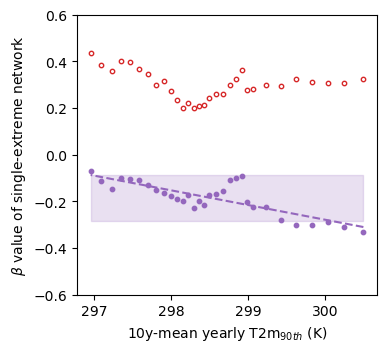

In [41]:
fig = plt.figure(figsize=(4,4))
ax = plt.axes((0.18,0.27,0.75,0.7))

X = np.array(sequence_T_value)


for y,y1, label1,n in zip(y_all,y_all1,label1_all,[0,1]):

    if mk.original_test(y)[2]<0.001:
        label = label1+', p<0.001'+', r=%.2f'%pearsonr(X,y)[0]
    else:
        label = label1+', p=%.3f'%mk.original_test(y)[2]+', r=%.2f'%pearsonr(X,y)[0]

    reg = LinearRegression().fit(X.reshape(-1, 1), y)
    
    reg.score(X.reshape(-1, 1), y)

    
    if n in [0,2]:
        ax.scatter(X,np.array(y),edgecolor=colors[nn[n]],label=label,marker=marker_all[n],color='white',s=10)
    else:
        ax.scatter(X,np.array(y),label=label,color=colors[nn[n]],marker=marker_all[n],s=10)    


    if abs(mk.original_test(y)[2])<0.05 :

        if(pearsonr(X,y)[0]>0.7)|(pearsonr(X,y)[0]<-0.7) :       

            a1 = reg.coef_
            b1=reg.intercept_
            ax.plot(X,a1*X+b1,linestyle='--',color=colors[nn[n]])
            ax.fill_between(X,np.nanpercentile(y1,5),np.nanpercentile(y1,95),alpha=0.2,color=colors[nn[n]])
            #print(reg.score(X.reshape(-1, 1), y))
            print(a1,b1)

ax.set_xlabel('10y-mean yearly T2m$_{90th}$ (K)')
# ax.set_title(label,fontsize=9)
ax.set_ylabel(r'${\beta}$ value of single-extreme network')
ax.set_ylim(-0.6,0.6)

# plt.savefig('Fig.Belta_trend_for_T_part1.jpg', dpi=300)
plt.show()

[0.10088704] -29.91741044740577


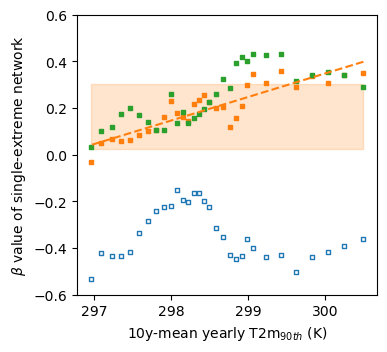

In [42]:
fig = plt.figure(figsize=(4,4))
ax = plt.axes((0.18,0.27,0.75,0.7))

X = np.array(sequence_T_value)


for y,y1, label1,n in zip(y_all[2:],y_all1[2:],label1_all[2:],[2,3,4]):

    if mk.original_test(y)[2]<0.001:
        label = label1+', p<0.001'+', r=%.2f'%pearsonr(X,y)[0]
    else:
        label = label1+', p=%.3f'%mk.original_test(y)[2]+', r=%.2f'%pearsonr(X,y)[0]

    reg = LinearRegression().fit(X.reshape(-1, 1), y)
    
    reg.score(X.reshape(-1, 1), y)

    
    if n in [0,2]:
        ax.scatter(X,np.array(y),edgecolor=colors[nn[n]],label=label,marker=marker_all[n],color='white',s=10)
    else:
        ax.scatter(X,np.array(y),label=label,color=colors[nn[n]],marker=marker_all[n],s=10)    

    if abs(mk.original_test(y)[2])<0.05 :
 
        if(pearsonr(X,y)[0]>0.7)|(pearsonr(X,y)[0]<-0.7) :       

            a1 = reg.coef_
            b1=reg.intercept_
            ax.plot(X,a1*X+b1,linestyle='--',color=colors[nn[n]])
            ax.fill_between(X,np.nanpercentile(y1,5),np.nanpercentile(y1,95),alpha=0.2,color=colors[nn[n]])
            #print(reg.score(X.reshape(-1, 1), y))
            print(a1,b1)

ax.set_xlabel('10y-mean yearly T2m$_{90th}$ (K)')
# ax.set_title(label,fontsize=9)
ax.set_ylabel(r'${\beta}$ value of single-extreme network')
ax.set_ylim(-0.6,0.6)


plt.show()

In [43]:

y_all = [
        z_to_t2_new,\
        wsd_to_t2_new,\
        z_to_wsd2_new,\
             wsd_to_wsd2_new,\
         t_to_wsd2_new  ]

label1_all = [
    r'Z500$_{T}{\rightarrow}$T2m (single event)',\
    r'WSD${\rightarrow}$T2m (single event)',\
        r'Z500$_{W}{\rightarrow}$WSD (single event)',\
    r'WSD${\rightarrow}$WSD (single event)',\
    r'T2m${\rightarrow}$WSD (single event)']
y_all1 = [
        z_to_t_all[10],\
      wsd_to_t_all[10] ,\
        z_to_wsd_all[10],\
             wsd_to_wsd_all[10],\
         t_to_wsd_all[10]]

marker_all = ['o','o','s','s','s']
nn = [3,4,0,1,2]

In [44]:
pearsonr(X,y)[0]

0.772431185230168

[0.08526427] 0.5314016161150976


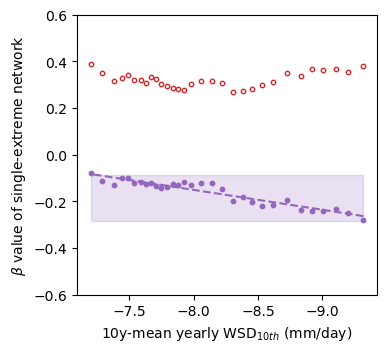

In [45]:
fig = plt.figure(figsize=(4,4))
ax = plt.axes((0.18,0.27,0.75,0.7))


X = np.array(sequence_WSD_value)

for y,y1, label1,n in zip(y_all,y_all1,label1_all,[0,1]):
    if mk.original_test(y)[2]<0.001:
        label = label1+', p<0.001'+', r=%.2f'%pearsonr(X,y)[0]
    else:
        label = label1+', p=%.3f'%mk.original_test(y)[2]+', r=%.2f'%pearsonr(X,y)[0]
    if n in [0,2]:
        ax.scatter(X,np.array(y),edgecolor=colors[nn[n]],label=label,marker=marker_all[n],color='white',s=10)
    else:
        ax.scatter(X,np.array(y),label=label,color=colors[nn[n]],marker=marker_all[n],s=10)    


    if abs(mk.original_test(y)[2])<0.01 :
        if(pearsonr(X,y)[0]>0.7)|(pearsonr(X,y)[0]<-0.7) :       
            reg = LinearRegression().fit(X.reshape(-1, 1), y)
            
            reg.score(X.reshape(-1, 1), y)
            a1 = reg.coef_
            b1=reg.intercept_
            ax.plot(X,a1*X+b1,linestyle='--',color=colors[nn[n]])
            ax.fill_between(X,np.nanpercentile(y1,5),np.nanpercentile(y1,95),alpha=0.2,color=colors[nn[n]])
            #print(reg.score(X.reshape(-1, 1), y))
            print(a1,b1)


ax.set_xlabel('10y-mean yearly WSD$_{10th}$ (mm/day)')
# ax.set_title(label,fontsize=9)
ax.set_ylabel(r'${\beta}$ value of single-extreme network')
ax.set_ylim(-0.6,0.6)
ax.invert_xaxis()


plt.show()

[0.09582031] 0.4173454042726017
[-0.07058834] -0.4046905681737675


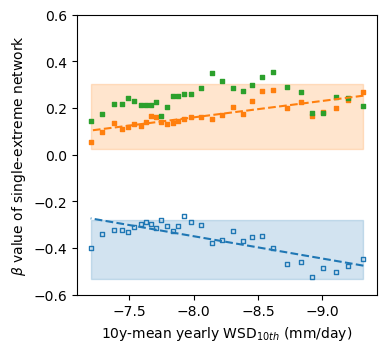

In [46]:
fig = plt.figure(figsize=(4,4))
ax = plt.axes((0.18,0.27,0.75,0.7))

X = np.array(sequence_WSD_value)

for y,y1, label1,n in zip(y_all[2:],y_all1[2:],label1_all[2:],[2,3,4]):
    if mk.original_test(y)[2]<0.001:
        label = label1+', p<0.001'+', r=%.2f'%pearsonr(X,y)[0]
    else:
        label = label1+', p=%.3f'%mk.original_test(y)[2]+', r=%.2f'%pearsonr(X,y)[0]
    if n in [0,2]:
        ax.scatter(X,np.array(y),edgecolor=colors[nn[n]],label=label,marker=marker_all[n],color='white',s=10)
    else:
        ax.scatter(X,np.array(y),label=label,color=colors[nn[n]],marker=marker_all[n],s=10)    

   
    if abs(mk.original_test(y)[2])<0.01 :
        if(pearsonr(X,y)[0]>0.7)|(pearsonr(X,y)[0]<-0.7) :       
            reg = LinearRegression().fit(X.reshape(-1, 1), y)
            
            reg.score(X.reshape(-1, 1), y)
            a1 = reg.coef_
            b1=reg.intercept_
            ax.plot(X,a1*X+b1,linestyle='--',color=colors[nn[n]])
            ax.fill_between(X,np.nanpercentile(y1,5),np.nanpercentile(y1,95),alpha=0.2,color=colors[nn[n]])

            print(a1,b1)


ax.set_xlabel('10y-mean yearly WSD$_{10th}$ (mm/day)')
ax.set_ylabel(r'${\beta}$ value of single-extreme network')
ax.set_ylim(-0.6,0.6)
ax.invert_xaxis()

plt.show()